# **Cyber Bullying Dataset**

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path to your dataset in Google Drive
file_path = '/content/drive/MyDrive/processed_cb_updated.csv'
# Load the dataset
df = pd.read_csv(file_path)

## **EDA**

In [ ]:
df.head()

,label,text
0,Not Bullying,legs amputated would change height weight driv...
1,Bullying,im really enjoying one product images stick gu...
2,Bullying,isis world recognized terrorist organization f...
3,Bullying,rgay like feminist book people even ones disli...
4,Bullying,feel free keep following one


In [ ]:
df.shape

(85037, 2)

In [ ]:
df.isnull().sum()

,0
label,0
text,0


In [ ]:
df.duplicated().sum()

29387

In [ ]:
print(df.duplicated)

<bound method DataFrame.duplicated of               label                                               text
0      Not Bullying  legs amputated would change height weight driv...
1          Bullying  im really enjoying one product images stick gu...
2          Bullying  isis world recognized terrorist organization f...
3          Bullying  rgay like feminist book people even ones disli...
4          Bullying                       feel free keep following one
...             ...                                                ...
85032  Not Bullying                       thequinnspiracy amazing love
85033  Not Bullying  hey taebrooks taebrooksteam think cover dont l...
85034  Not Bullying  bdssupporter abbswinston contrarian82 abbymart...
85035  Not Bullying                          laugh loud funny shit huh
85036  Not Bullying                                  rob ditch hat mkr

[85037 rows x 2 columns]>


In [ ]:
df.dtypes

,0
label,object
text,object


In [ ]:
df['label'].value_counts()

,count
label,
Bullying,43686
Not Bullying,41351


In [ ]:
df['label'].unique()

array(['Not Bullying', 'Bullying'], dtype=object)

## **Data Preprocessing**

### **1. Text Cleaning**

In [ ]:
# Lowercasing
df['text'] = df['text'].str.lower()
df['label']= df['label'].str.lower()

In [ ]:
# Remove Punctuation
import string
df['text'] = df['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [ ]:
# Remove Numbers
df['text'] = df['text'].str.replace('\d+', '', regex=True)

In [ ]:
# Remove Whitespace
df['text'] = df['text'].str.strip()

In [ ]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Remove Emojis

import re
df['text'] = df['text'].apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))

In [ ]:
# Example: Remove repeated characters (e.g., "soooo" -> "so")
df['text'] = df['text'].apply(lambda x: re.sub(r'(.)\1+', r'\1', x))

### **2. Text Normalization**

In [ ]:
# Tokenization

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

# Now apply word_tokenize
df['text'] = df['text'].apply(word_tokenize)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Lemmatization
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Stemming

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df['text'] = df['text'].apply(lambda x: [stemmer.stem(word) for word in x])

In [ ]:
# Remove rare words
from collections import Counter

# Count word frequencies
# Convert list of tokens to a single string for each row before joining
word_freq = Counter(" ".join([" ".join(tokens) for tokens in df['text']]).split())
rare_words = set(word for word, freq in word_freq.items() if freq < 2)

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x if word not in rare_words]))

In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 12.2 MB/s eta 0:00:00


In [ ]:
# Handeling contractions
import contractions

# Join the tokens back into a single string before applying contractions.fix
df['text_contractions'] = df['text'].apply(lambda x: ' '.join(x))
df['text_contractions'] = df['text'].apply(lambda x: contractions.fix(x))

In [ ]:
# Removing URLs and HTML Tags

import re

df['text'] = df['text'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.MULTILINE))
df['text'] = df['text'].apply(lambda x: re.sub(r'<.*?>', '', x))
df['text'] = df['text'].apply(lambda x: re.sub(r'#\w+', '', x))
df['text'] = df['text'].apply(lambda x: re.sub(r'@\w+', '', x))
df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))



In [ ]:
# Example: Replace "not good" with "not_good"

df['text'] = df['text'].apply(lambda x: re.sub(r'\bnot\s+\w+', lambda match: match.group().replace(' ', '_'), x))

In [ ]:
import re

# Expanded list of intensifiers
intensifiers = {
    "very": "",
    "extremely": "",
    "really": "",
    "quite": "",
    "too": "",
    "so": "",
    "incredibly": "",
    "absolutely": "",
    "completely": "",
    "totally": "",
    "utterly": "",
    "highly": "",
    "somewhat": "",
    "slightly": "",
    "rather": "",
    "pretty": "",
    "fairly": "",
    "just": "",
    "almost": "",
    "barely": "",
    "nearly": "",
    "partially": "",
    "mostly": "",
    "purely": "",
    "simply": "",
    "truly": "",
    "literally": "",
    "kind of": "",
    "sort of": "",
    "a bit": "",
    "a little": "",
    "a tad": "",
}

# Function to replace intensifiers
def replace_intensifiers(text, intensifiers):
    for word, replacement in intensifiers.items():
        # Use regex to handle word boundaries and multi-word intensifiers
        pattern = r'\b' + re.escape(word) + r'\b'
        text = re.sub(pattern, replacement, text, flags=re.IGNORECASE)
    # Remove extra spaces caused by replacements
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the function to the DataFrame
df['text'] = df['text'].apply(lambda x: replace_intensifiers(x, intensifiers))

In [ ]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 21.7 MB/s eta 0:00:00


### **3. Handling Imbalanced Data**

In [ ]:
# Oversampling

from sklearn.utils import resample

# Ensure labels are compared correctly (case-sensitive and without trailing spaces)
bullying = df[df['label'].str.strip().str.lower() == 'bullying']
not_bullying = df[df['label'].str.strip().str.lower() == 'not bullying']

# Check if 'bullying' DataFrame is empty and handle accordingly
if len(bullying) == 0:
    # Handle the case where there are no 'bullying' instances.
    # You might want to raise an error, log a warning, or skip the upsampling.
    print("Warning: No 'bullying' instances found in the dataset. Skipping upsampling.")
else:
    not_bullying = resample(not_bullying, replace=True, n_samples=len(bullying), random_state=42)
    df = pd.concat([bullying, not_bullying])

In [ ]:
df['label'].value_counts()

,count
label,
bullying,43686
not bullying,43686


In [ ]:
df.head()

,label,text,text_contractions
1,bullying,im reali enjoy one product imag stick gum also...,i am reali enjoy one product imag stick gum al...
2,bullying,isi world recogn terorist organ folow quran wo...,isi world recogn terorist organ folow quran wo...
3,bullying,rgay like feminist bok peopl even one dislik a...,rgay like feminist bok peopl even one dislik a...
4,bullying,fel fre kep folow one,fel fre kep folow one
5,bullying,love five buck say also buli girl midl high schol,love five buck say also buli girl midl high schol


In [ ]:
df.dtypes

,0
label,object
text,object
text_contractions,object


In [ ]:
# # from sklearn.feature_extraction.text import TfidfVectorizer

# # # 1. Join the tokens back into a single string
# # df['text'] = df['text'].apply(lambda x: ' '.join(x))

# # # 2. Create a TF-IDF vectorizer with a reduced stop word list or custom tokenization
# # vectorizer = TfidfVectorizer(stop_words='english',  # Use 'english' for built-in stop words
# #                              # Or provide a custom list: stop_words=['your', 'custom', 'stopwords']
# #                              tokenizer=lambda x: x.split())  # Use simple splitting

# # # 3. Fit and transform the text data
# # X = vectorizer.fit_transform(df['text'])

# # 4. Now apply SMOTE
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(text'], df['label'])

In [ ]:
df['label'] = df['label'].map({'bullying': 1, 'not bullying': 0})

In [ ]:
df.head()

,label,text,text_contractions
1,1,im reali enjoy one product imag stick gum also...,i am reali enjoy one product imag stick gum al...
2,1,isi world recogn terorist organ folow quran wo...,isi world recogn terorist organ folow quran wo...
3,1,rgay like feminist bok peopl even one dislik a...,rgay like feminist bok peopl even one dislik a...
4,1,fel fre kep folow one,fel fre kep folow one
5,1,love five buck say also buli girl midl high schol,love five buck say also buli girl midl high schol


## **Machine Learning Models**

### **SVM**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming 'df' is your DataFrame and 'text' is the text column
# 1. Join the tokens back into a single string if necessary
df['text'] = df['text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# 2. Create a TF-IDF vectorizer if you are using TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])

# 3. Now apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, df['label'])  # Use 'X' instead of 'text'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 1. Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("SVM Results:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Results:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      8688
           1       0.94      0.82      0.87      8787

    accuracy                           0.88     17475
   macro avg       0.89      0.88      0.88     17475
weighted avg       0.89      0.88      0.88     17475

Confusion Matrix:
 [[8194  494]
 [1592 7195]]
Accuracy: 0.8806294706723892


### **Logistic Regression**

In [ ]:
# Logistic Regression
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg_model.predict(X_test)

# Evaluation
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      8688
           1       0.92      0.80      0.85      8787

    accuracy                           0.86     17475
   macro avg       0.87      0.86      0.86     17475
weighted avg       0.87      0.86      0.86     17475

Confusion Matrix:
 [[8074  614]
 [1779 7008]]
Accuracy: 0.8630615164520744


### **Random Forest**

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      8688
           1       0.97      0.86      0.91      8787

    accuracy                           0.92     17475
   macro avg       0.92      0.92      0.92     17475
weighted avg       0.92      0.92      0.92     17475

Confusion Matrix:
 [[8443  245]
 [1210 7577]]
Accuracy: 0.9167381974248927


## **Deep Learning Models**

### **LSTM**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Tokenize and pad sequences
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(sequences, maxlen=100)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 483s 421ms/step - accuracy: 0.7993 - loss: 0.4245 - val_accuracy: 0.8652 - val_loss: 0.3089
Epoch 2/10
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 400s 366ms/step - accuracy: 0.8858 - loss: 0.2674 - val_accuracy: 0.8842 - val_loss: 0.2811
Epoch 3/10
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 444s 368ms/step - accuracy: 0.9093 - loss: 0.2121 - val_accuracy: 0.8927 - val_loss: 0.2834
Epoch 4/10
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 437s 363ms/step - accuracy: 0.9274 - loss: 0.1724 - val_accuracy: 0.9009 - val_loss: 0.2844
Epoch 5/10
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 440s 361ms/step - accuracy: 0.9413 - loss: 0.1460 - val_accuracy: 0.9062 - val_loss: 0.3107
Epoch 6/10
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 440s 360ms/step - accuracy: 0.9501 - loss: 0.1229 - val_accuracy: 0.9123 - val_loss: 0.3203
Epoch 7/10
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 446s 364ms/step - accuracy: 0.9599 - loss: 0.1051 - val_accuracy: 0.9138 - val_loss: 0.3387
Epoch 8/10
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 439s 361ms/step - ac

In [ ]:
# ✅ Model Predictions (Probability & Binary)
y_pred_prob = model.predict(X_test).ravel()  # Predicted probabilities
y_pred = (y_pred_prob > 0.5).astype("int")        # Final predicted labels (0/1)

# ✅ Import classification_report
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

# ✅ Classification Report (Precision, Recall, F1-Score)
print("\n🔹 LSTM Model Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Bullying", "Bullying"]))

# ✅ Additional Key Scores
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = (y_test == y_pred).mean()

print(f"🔹 Accuracy:  {accuracy:.4f}")
print(f"🔹 F1 Score:  {f1:.4f}")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall:    {recall:.4f}")

547/547 ━━━━━━━━━━━━━━━━━━━━ 38s 69ms/step

🔹 LSTM Model Classification Report:
              precision    recall  f1-score   support

Not Bullying       0.88      0.96      0.92      8688
    Bullying       0.96      0.87      0.91      8787

    accuracy                           0.92     17475
   macro avg       0.92      0.92      0.92     17475
weighted avg       0.92      0.92      0.92     17475

🔹 Accuracy:  0.9180
🔹 F1 Score:  0.9146
🔹 Precision: 0.9600
🔹 Recall:    0.8733


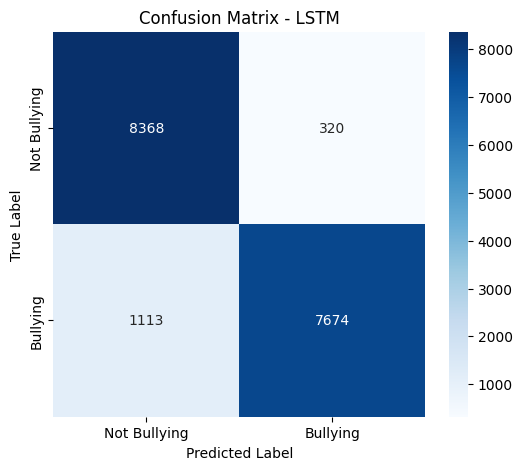

In [ ]:
# ✅ Confusion Matrix Visualization
import matplotlib.pyplot as plt  # Import the pyplot module
from sklearn.metrics import confusion_matrix # Import confusion_matrix
import seaborn as sns  # Import seaborn for heatmap visualization

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Bullying', 'Bullying'],
            yticklabels=['Not Bullying', 'Bullying'])
plt.title('Confusion Matrix - LSTM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

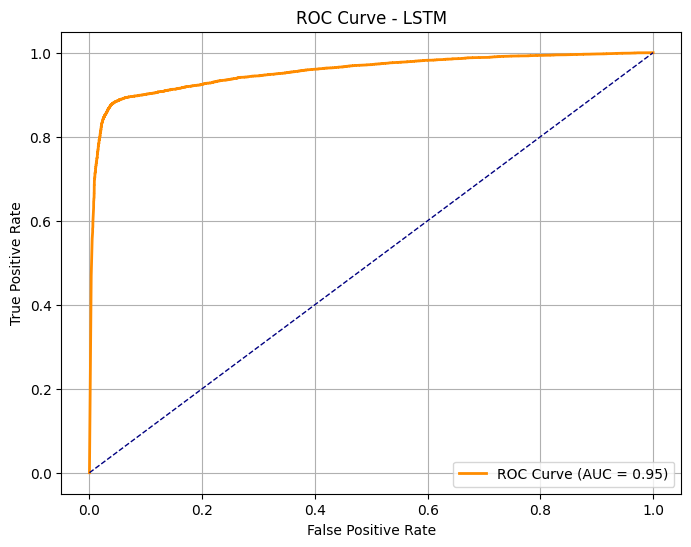

In [ ]:
# ✅ ROC Curve + AUC Visualization
from sklearn.metrics import roc_curve, auc # Import roc_curve and auc

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LSTM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

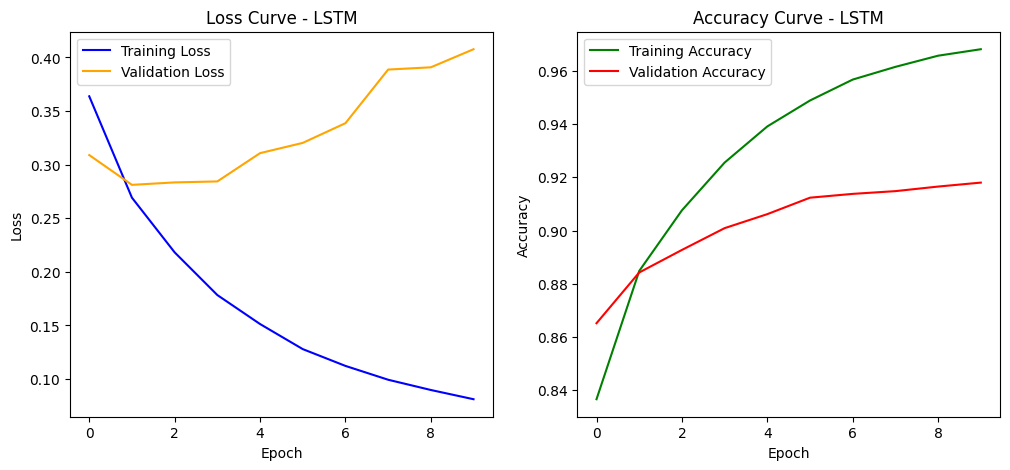

In [ ]:
# ✅ Training Loss & Accuracy Visualization (History Curve)
plt.figure(figsize=(12, 5))

# 🔹 Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue') # Changed history_lstm to history
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange') # Changed history_lstm to history
plt.title('Loss Curve - LSTM')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 🔹 Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green') # Changed history_lstm to history
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red') # Changed history_lstm to history
plt.title('Accuracy Curve - LSTM')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### **BiLSTM**

In [ ]:
# ✅ Install libraries (if needed)
!pip install contractions
!pip install pyspellchecker

In [ ]:
# ✅ Import Libraries
import pandas as pd
import numpy as np
import nltk
import string
import re
import contractions
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# ✅ Tokenization and Padding
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(sequences, maxlen=100)

In [ ]:
# ✅ Train-Test Split
y = df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# ✅ GPU Optimization (Ensure Colab uses GPU)
import tensorflow as tf
print("Using GPU:", tf.config.list_physical_devices('GPU'))

Using GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(32)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# ✅ Train Model (5 epochs as requested)
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# ✅ Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/5
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.7972 - loss: 0.4260 - val_accuracy: 0.8661 - val_loss: 0.3048
Epoch 2/5
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 48s 38ms/step - accuracy: 0.8886 - loss: 0.2582 - val_accuracy: 0.8875 - val_loss: 0.2787
Epoch 3/5
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 63s 21ms/step - accuracy: 0.9192 - loss: 0.1982 - val_accuracy: 0.9017 - val_loss: 0.2761
Epoch 4/5
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9352 - loss: 0.1600 - val_accuracy: 0.9068 - val_loss: 0.2963
Epoch 5/5
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 43s 24ms/step - accuracy: 0.9490 - loss: 0.1260 - val_accuracy: 0.9073 - val_loss: 0.3078
547/547 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9033 - loss: 0.3204
Test Accuracy: 0.9073


In [ ]:
# ✅ Predictions
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype("int")

# ✅ Classification Report
print("\n🔹 BiLSTM Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Bullying", "Bullying"]))

547/547 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step

🔹 BiLSTM Classification Report:
              precision    recall  f1-score   support

Not Bullying       0.88      0.94      0.91      8688
    Bullying       0.94      0.87      0.90      8787

    accuracy                           0.91     17475
   macro avg       0.91      0.91      0.91     17475
weighted avg       0.91      0.91      0.91     17475



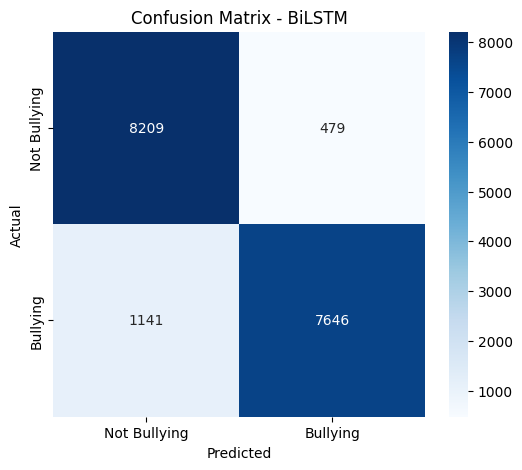

In [ ]:
# ✅ Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Not Bullying', 'Bullying'],
            yticklabels=['Not Bullying', 'Bullying'])
plt.title('Confusion Matrix - BiLSTM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

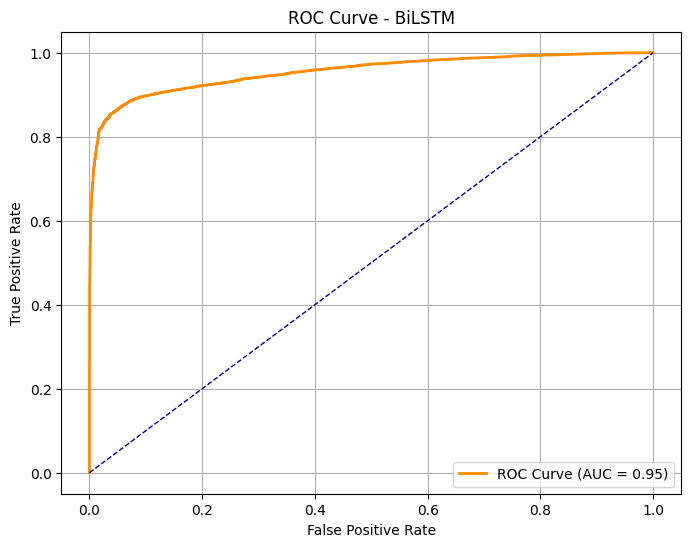

In [ ]:
# ✅ ROC Curve & AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - BiLSTM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

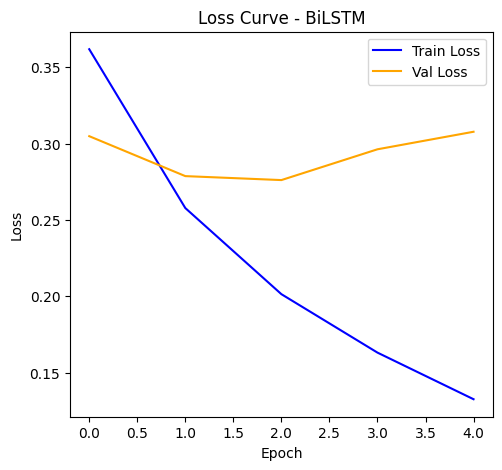

In [ ]:

# ✅ Training History Visualization
plt.figure(figsize=(12, 5))

# 🔹 Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
plt.title('Loss Curve - BiLSTM')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

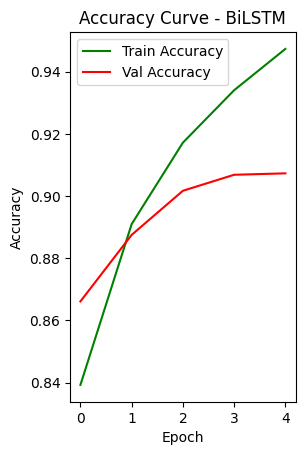

In [ ]:
# 🔹 Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='red')
plt.title('Accuracy Curve - BiLSTM')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
# ✅ Final Key Metrics
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"🔹 Final Scores (BiLSTM):")
print(f"  - Accuracy:  {accuracy:.4f}")
print(f"  - F1 Score:  {f1:.4f}")
print(f"  - Precision: {precision:.4f}")
print(f"  - Recall:    {recall:.4f}")

🔹 Final Scores (BiLSTM):
  - Accuracy:  0.9073
  - F1 Score:  0.9042
  - Precision: 0.9410
  - Recall:    0.8701


### **BiLSTM + Sparse Attention**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenizer and padding
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])

sequences = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

y = df['label'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, Layer, Input
from tensorflow.keras import Model
import tensorflow.keras.backend as K

class SparseAttention(Layer):
    def __init__(self, **kwargs):
        super(SparseAttention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="attention_weight", shape=(input_shape[-1], 1),
                                 initializer="normal", trainable=True)
        self.b = self.add_weight(name="attention_bias", shape=(1,),
                                 initializer="zeros", trainable=True)
        super(SparseAttention, self).build(input_shape)

    def call(self, x):
        attention_logits = K.dot(x, self.W) + self.b
        attention_weights = K.softmax(attention_logits, axis=1)
        weighted_output = x * attention_weights
        return K.sum(weighted_output, axis=1)

# Build the BiLSTM + Sparse Attention Model
sequence_input = Input(shape=(100,), dtype='int32')
embedding_layer = Embedding(input_dim=10000, output_dim=128, input_length=100)(sequence_input)
bi_lstm = Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(embedding_layer)
attention_output = SparseAttention()(bi_lstm)
x = Dense(64, activation='relu')(attention_output)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=sequence_input, outputs=output)

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 100, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 100, 256)            │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sparse_attention (SparseAttention)   │ (None, 256)                 │             257 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,559,938 (5.95 MB)

 Trainable params: 1,559,938 (5.95 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=7, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/7
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 743s 668ms/step - accuracy: 0.7537 - loss: 0.4758 - val_accuracy: 0.8637 - val_loss: 0.3060
Epoch 2/7
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 709s 638ms/step - accuracy: 0.8861 - loss: 0.2696 - val_accuracy: 0.8808 - val_loss: 0.2818
Epoch 3/7
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 740s 637ms/step - accuracy: 0.9106 - loss: 0.2110 - val_accuracy: 0.8944 - val_loss: 0.2806
Epoch 4/7
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 738s 633ms/step - accuracy: 0.9256 - loss: 0.1729 - val_accuracy: 0.8971 - val_loss: 0.2828
Epoch 5/7
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 734s 626ms/step - accuracy: 0.9364 - loss: 0.1521 - val_accuracy: 0.9005 - val_loss: 0.2925
Epoch 6/7
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 737s 622ms/step - accuracy: 0.9482 - loss: 0.1270 - val_accuracy: 0.9064 - val_loss: 0.3007
Epoch 7/7
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 689s 628ms/step - accuracy: 0.9553 - loss: 0.1113 - val_accuracy: 0.9092 - val_loss: 0.3423


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype("int")

# Classification Report
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Bullying", "Bullying"]))

547/547 ━━━━━━━━━━━━━━━━━━━━ 62s 111ms/step

🔹 Classification Report:
              precision    recall  f1-score   support

Not Bullying       0.87      0.96      0.91      8688
    Bullying       0.96      0.86      0.90      8787

    accuracy                           0.91     17475
   macro avg       0.91      0.91      0.91     17475
weighted avg       0.91      0.91      0.91     17475



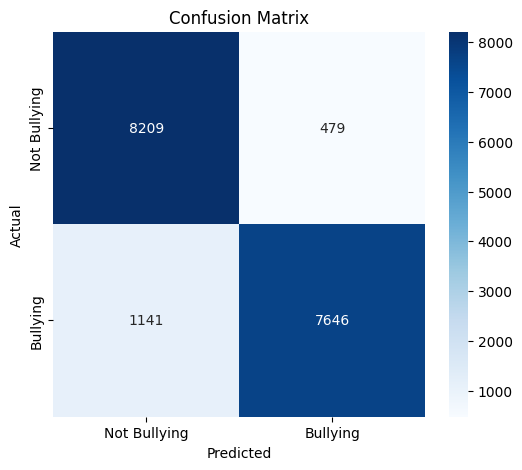

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Bullying', 'Bullying'],
            yticklabels=['Not Bullying', 'Bullying'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

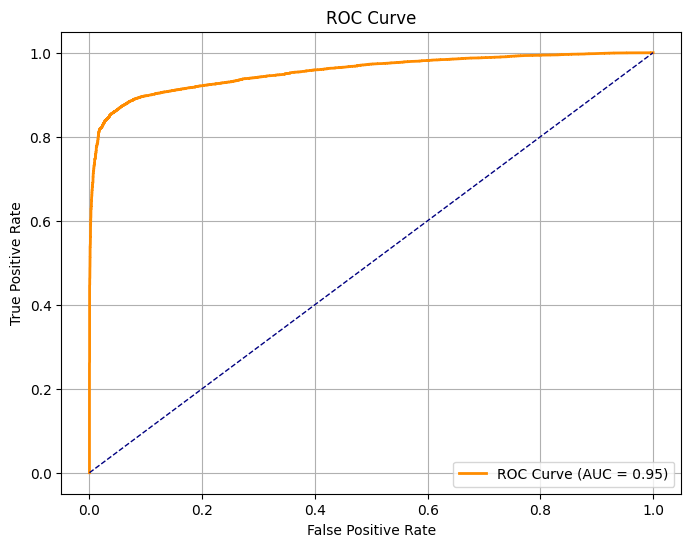

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

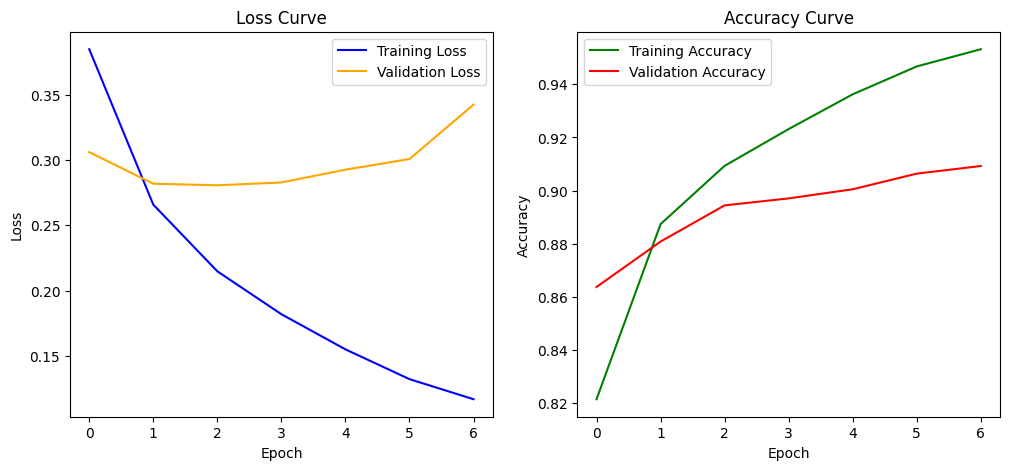

In [ ]:
plt.figure(figsize=(12, 5))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### **Bert**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_scheduler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Check GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Load tokenizer & BERT model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2).to(device)

# Text encoding function
def encode_texts(texts, max_len=128):
    encoded = tokenizer.batch_encode_plus(
        texts,
        add_special_tokens=True,
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )
    return encoded['input_ids'], encoded['attention_mask']

Using device: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Prepare data (Assuming `df` already cleaned)
texts, labels = df['text'].tolist(), df['label'].tolist()
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

train_input_ids, train_attention_masks = encode_texts(train_texts)
val_input_ids, val_attention_masks = encode_texts(val_texts)

train_labels = torch.tensor(train_labels)
val_labels = torch.tensor(val_labels)

# Dataset & Dataloader
train_dataset = TensorDataset(train_input_ids, train_attention_masks, train_labels)
val_dataset = TensorDataset(val_input_ids, val_attention_masks, val_labels)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Optimizer & Scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=len(train_loader) * 5)


/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Training Loop
epochs = 5
train_losses, val_accuracies = [], []

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = [x.to(device) for x in batch]

            outputs = model(input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    val_acc = accuracy_score(all_labels, all_preds)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_train_loss:.4f} - Val Accuracy: {val_acc:.4f}")

Epoch 1/5 - Loss: 0.3488 - Val Accuracy: 0.8770
Epoch 2/5 - Loss: 0.2342 - Val Accuracy: 0.9012
Epoch 3/5 - Loss: 0.1555 - Val Accuracy: 0.9152
Epoch 4/5 - Loss: 0.1076 - Val Accuracy: 0.9163
Epoch 5/5 - Loss: 0.0804 - Val Accuracy: 0.9207


In [ ]:
# Final Evaluation
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=['Not Bullying', 'Bullying']))


Classification Report:
              precision    recall  f1-score   support

Not Bullying       0.89      0.96      0.92      8688
    Bullying       0.95      0.88      0.92      8787

    accuracy                           0.92     17475
   macro avg       0.92      0.92      0.92     17475
weighted avg       0.92      0.92      0.92     17475



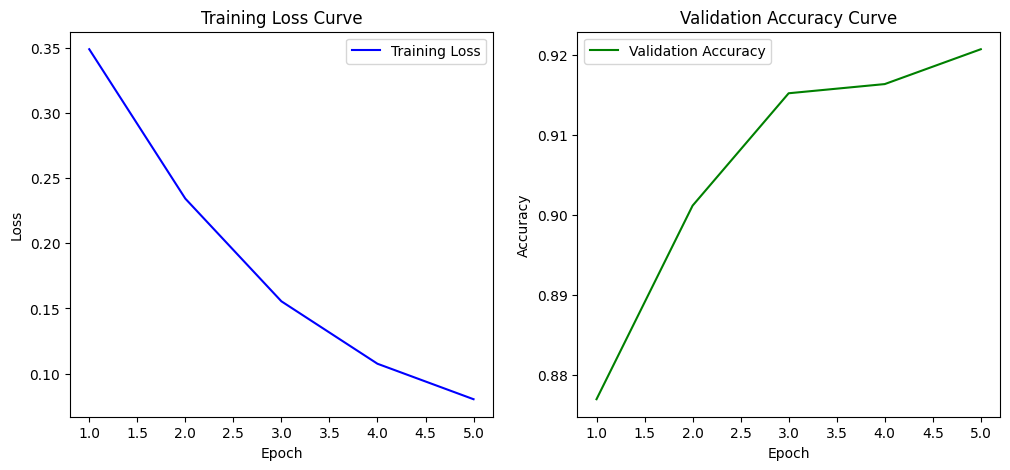

In [ ]:
# Visualization
def plot_training_curves(train_losses, val_accuracies):
    epochs_range = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 5))
    # Loss Curve
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label='Training Loss', color='blue')
    plt.title('Training Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy Curve
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, val_accuracies, label='Validation Accuracy', color='green')
    plt.title('Validation Accuracy Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_training_curves(train_losses, val_accuracies)

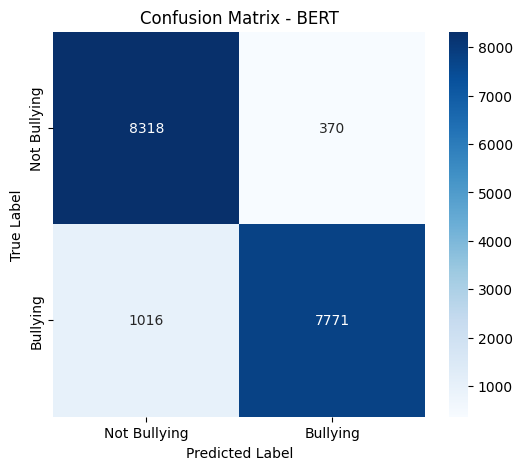

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Bullying', 'Bullying'],
            yticklabels=['Not Bullying', 'Bullying'])
plt.title('Confusion Matrix - BERT')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

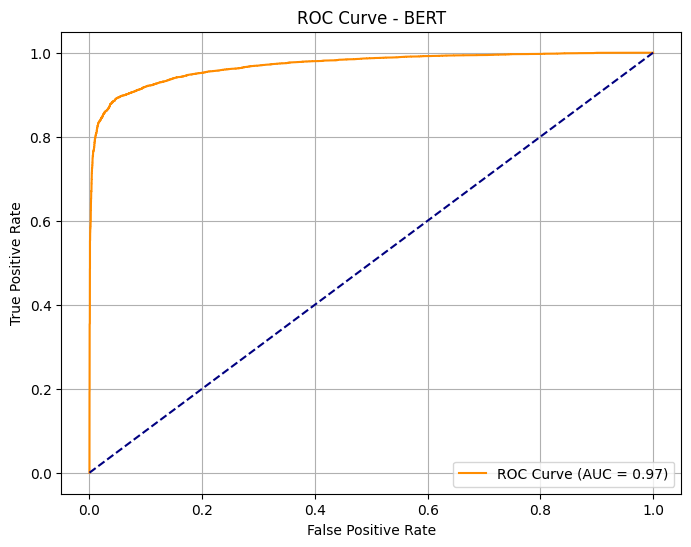

In [ ]:
# ROC Curve & AUC
probabilities = []
with torch.no_grad():
    for batch in val_loader:
        input_ids, attention_mask, _ = [x.to(device) for x in batch]
        outputs = model(input_ids, attention_mask=attention_mask)
        probs = F.softmax(outputs.logits, dim=1)[:, 1]
        probabilities.extend(probs.cpu().numpy())

fpr, tpr, _ = roc_curve(all_labels, probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - BERT')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# Final Scores
f1 = f1_score(all_labels, all_preds)
precision = classification_report(all_labels, all_preds, output_dict=True)['1']['precision']
recall = classification_report(all_labels, all_preds, output_dict=True)['1']['recall']
accuracy = accuracy_score(all_labels, all_preds)

print(f"📊 Final Metrics:")
print(f"  ✔️ Accuracy:  {accuracy:.4f}")
print(f"  ✔️ F1 Score:  {f1:.4f}")
print(f"  ✔️ Precision: {precision:.4f}")
print(f"  ✔️ Recall:    {recall:.4f}")

📊 Final Metrics:
  ✔️ Accuracy:  0.9207
  ✔️ F1 Score:  0.9181
  ✔️ Precision: 0.9546
  ✔️ Recall:    0.8844


### **RoBERTa**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW, get_scheduler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Check GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Load tokenizer & RoBERTa model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2).to(device)

# Text encoding function
def encode_texts(texts, max_len=128):
    encoded = tokenizer.batch_encode_plus(
        texts,
        add_special_tokens=True,
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )
    return encoded['input_ids'], encoded['attention_mask']

Using device: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Prepare data (Assuming `df` already cleaned)
texts, labels = df['text'].tolist(), df['label'].tolist()
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

train_input_ids, train_attention_masks = encode_texts(train_texts)
val_input_ids, val_attention_masks = encode_texts(val_texts)

train_labels = torch.tensor(train_labels)
val_labels = torch.tensor(val_labels)

# Dataset & Dataloader
train_dataset = TensorDataset(train_input_ids, train_attention_masks, train_labels)
val_dataset = TensorDataset(val_input_ids, val_attention_masks, val_labels)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Optimizer & Scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=len(train_loader) * 5)

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Training Loop
epochs = 5
train_losses, val_accuracies = [], []

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = [x.to(device) for x in batch]

            outputs = model(input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    val_acc = accuracy_score(all_labels, all_preds)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_train_loss:.4f} - Val Accuracy: {val_acc:.4f}")

Epoch 1/5 - Loss: 0.3655 - Val Accuracy: 0.8668
Epoch 2/5 - Loss: 0.2801 - Val Accuracy: 0.8879
Epoch 3/5 - Loss: 0.2241 - Val Accuracy: 0.8989
Epoch 4/5 - Loss: 0.1781 - Val Accuracy: 0.9033
Epoch 5/5 - Loss: 0.1458 - Val Accuracy: 0.9095


In [ ]:
# Final Evaluation
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=['Not Bullying', 'Bullying']))


Classification Report:
              precision    recall  f1-score   support

Not Bullying       0.88      0.95      0.91      8688
    Bullying       0.94      0.87      0.91      8787

    accuracy                           0.91     17475
   macro avg       0.91      0.91      0.91     17475
weighted avg       0.91      0.91      0.91     17475



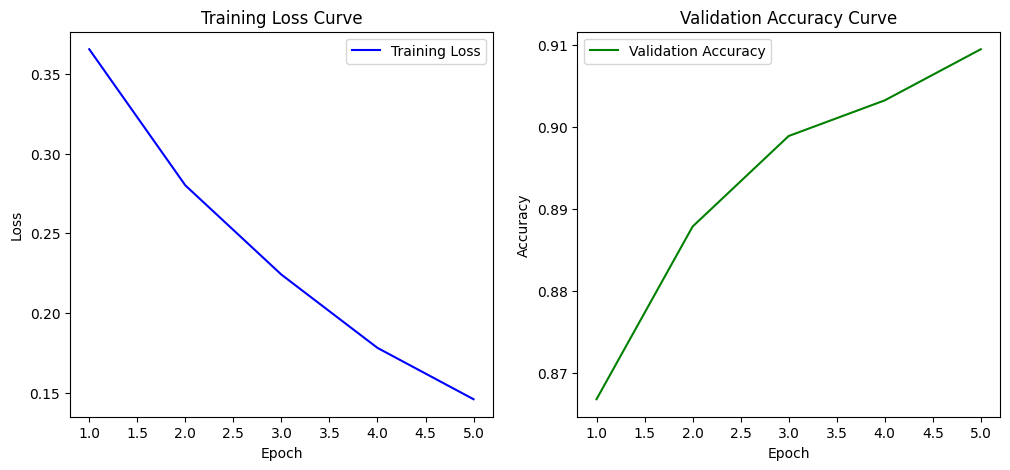

In [ ]:
# Visualization
def plot_training_curves(train_losses, val_accuracies):
    epochs_range = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 5))
    # Loss Curve
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label='Training Loss', color='blue')
    plt.title('Training Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy Curve
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, val_accuracies, label='Validation Accuracy', color='green')
    plt.title('Validation Accuracy Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_training_curves(train_losses, val_accuracies)

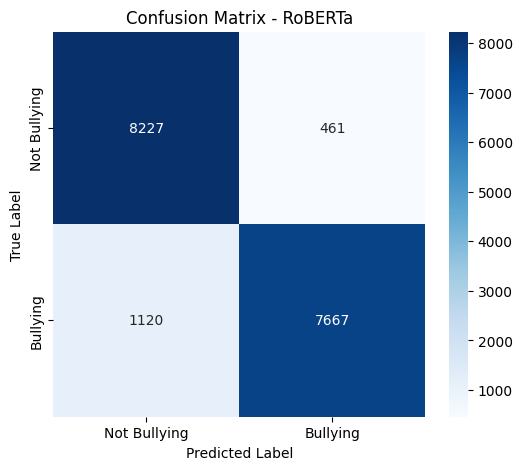

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Bullying', 'Bullying'],
            yticklabels=['Not Bullying', 'Bullying'])
plt.title('Confusion Matrix - RoBERTa')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

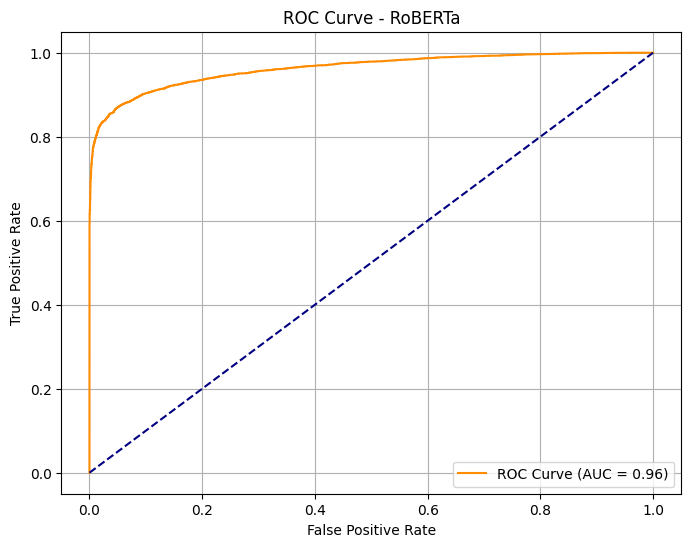

In [ ]:
# ROC Curve & AUC
probabilities = []
with torch.no_grad():
    for batch in val_loader:
        input_ids, attention_mask, _ = [x.to(device) for x in batch]
        outputs = model(input_ids, attention_mask=attention_mask)
        probs = F.softmax(outputs.logits, dim=1)[:, 1]
        probabilities.extend(probs.cpu().numpy())

fpr, tpr, _ = roc_curve(all_labels, probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RoBERTa')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# Final Scores
f1 = f1_score(all_labels, all_preds)
precision = classification_report(all_labels, all_preds, output_dict=True)['1']['precision']
recall = classification_report(all_labels, all_preds, output_dict=True)['1']['recall']
accuracy = accuracy_score(all_labels, all_preds)

print(f"\U0001F4CA Final Metrics:")
print(f"  ✔️ Accuracy:  {accuracy:.4f}")
print(f"  ✔️ F1 Score:  {f1:.4f}")
print(f"  ✔️ Precision: {precision:.4f}")
print(f"  ✔️ Recall:    {recall:.4f}")

📊 Final Metrics:
  ✔️ Accuracy:  0.9095
  ✔️ F1 Score:  0.9065
  ✔️ Precision: 0.9433
  ✔️ Recall:    0.8725


### **DistilBERT**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW, get_scheduler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Check GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Load tokenizer & DistilBERT model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2).to(device)

Using device: cuda


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Text encoding function
def encode_texts(texts, max_len=128):
    encoded = tokenizer.batch_encode_plus(
        texts,
        add_special_tokens=True,
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )
    return encoded['input_ids'], encoded['attention_mask']

In [ ]:
# Prepare data (Assuming `df` already cleaned)
texts, labels = df['text'].tolist(), df['label'].tolist()
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

train_input_ids, train_attention_masks = encode_texts(train_texts)
val_input_ids, val_attention_masks = encode_texts(val_texts)

train_labels = torch.tensor(train_labels)
val_labels = torch.tensor(val_labels)

# Dataset & Dataloader
train_dataset = TensorDataset(train_input_ids, train_attention_masks, train_labels)
val_dataset = TensorDataset(val_input_ids, val_attention_masks, val_labels)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Optimizer & Scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=len(train_loader) * 5)

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Training Loop
epochs = 5
train_losses, val_accuracies = [], []

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = [x.to(device) for x in batch]

            outputs = model(input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    val_acc = accuracy_score(all_labels, all_preds)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_train_loss:.4f} - Val Accuracy: {val_acc:.4f}")


Epoch 1/5 - Loss: 0.3495 - Val Accuracy: 0.8746
Epoch 2/5 - Loss: 0.2371 - Val Accuracy: 0.8991
Epoch 3/5 - Loss: 0.1593 - Val Accuracy: 0.9112
Epoch 4/5 - Loss: 0.1128 - Val Accuracy: 0.9169
Epoch 5/5 - Loss: 0.0871 - Val Accuracy: 0.9186


In [ ]:
# Final Evaluation
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=['Not Bullying', 'Bullying']))


Classification Report:
              precision    recall  f1-score   support

Not Bullying       0.89      0.96      0.92      8688
    Bullying       0.96      0.88      0.92      8787

    accuracy                           0.92     17475
   macro avg       0.92      0.92      0.92     17475
weighted avg       0.92      0.92      0.92     17475



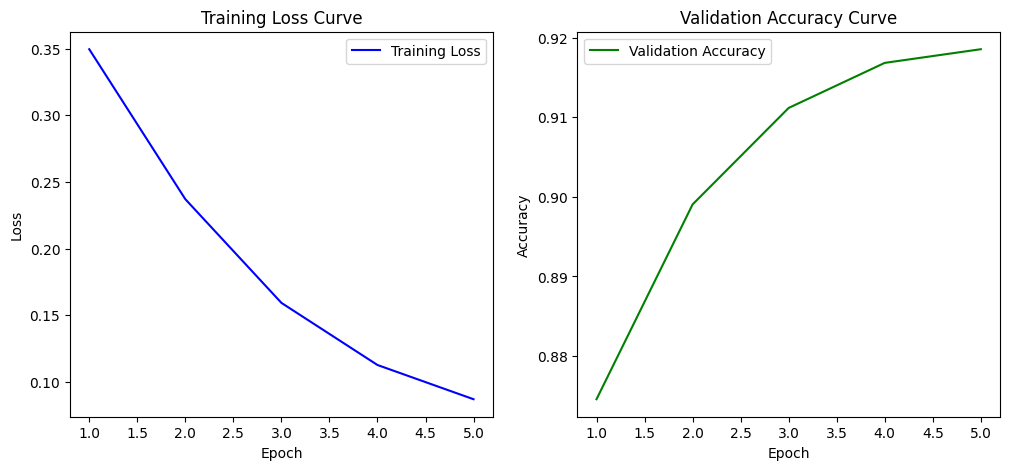

In [ ]:
# Visualization
def plot_training_curves(train_losses, val_accuracies):
    epochs_range = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 5))
    # Loss Curve
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label='Training Loss', color='blue')
    plt.title('Training Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy Curve
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, val_accuracies, label='Validation Accuracy', color='green')
    plt.title('Validation Accuracy Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_training_curves(train_losses, val_accuracies)

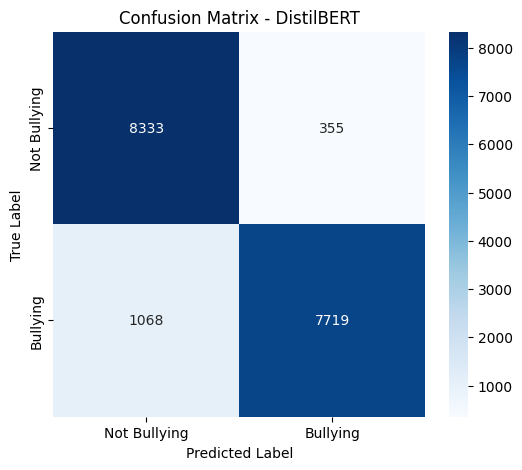

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Bullying', 'Bullying'],
            yticklabels=['Not Bullying', 'Bullying'])
plt.title('Confusion Matrix - DistilBERT')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

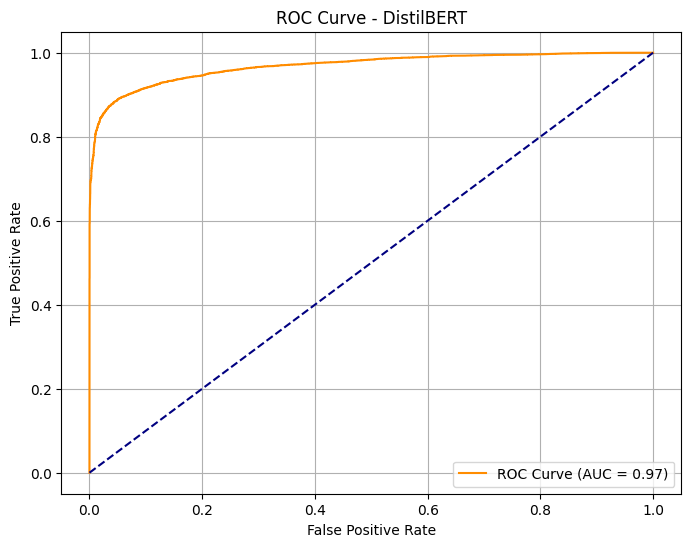

In [ ]:
# ROC Curve & AUC
probabilities = []
with torch.no_grad():
    for batch in val_loader:
        input_ids, attention_mask, _ = [x.to(device) for x in batch]
        outputs = model(input_ids, attention_mask=attention_mask)
        probs = F.softmax(outputs.logits, dim=1)[:, 1]
        probabilities.extend(probs.cpu().numpy())

fpr, tpr, _ = roc_curve(all_labels, probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - DistilBERT')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# Final Scores
f1 = f1_score(all_labels, all_preds)
precision = classification_report(all_labels, all_preds, output_dict=True)['1']['precision']
recall = classification_report(all_labels, all_preds, output_dict=True)['1']['recall']
accuracy = accuracy_score(all_labels, all_preds)

print(f"📊 Final Metrics:")
print(f"  ✔️ Accuracy:  {accuracy:.4f}")
print(f"  ✔️ F1 Score:  {f1:.4f}")
print(f"  ✔️ Precision: {precision:.4f}")
print(f"  ✔️ Recall:    {recall:.4f}")

📊 Final Metrics:
  ✔️ Accuracy:  0.9186
  ✔️ F1 Score:  0.9156
  ✔️ Precision: 0.9560
  ✔️ Recall:    0.8785


### **GRU model**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, get_scheduler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Check device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Load BERT tokenizer for consistent tokenization
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Using device: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Text encoding (convert text to input_ids & masks)
def encode_texts(texts, max_len=128):
    encoded = tokenizer.batch_encode_plus(
        texts,
        add_special_tokens=True,
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )
    return encoded['input_ids'], encoded['attention_mask']

In [ ]:
# Prepare data (assuming df is preloaded)
texts, labels = df['text'].tolist(), df['label'].tolist()
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

train_input_ids, _ = encode_texts(train_texts)
val_input_ids, _ = encode_texts(val_texts)

train_labels = torch.tensor(train_labels)
val_labels = torch.tensor(val_labels)

# Dataset & DataLoader
train_dataset = TensorDataset(train_input_ids, train_labels)
val_dataset = TensorDataset(val_input_ids, val_labels)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

In [ ]:
# ======= GRU Model =======
class GRUClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim=128, hidden_dim=256, num_layers=2, num_classes=2, dropout=0.3):
        super(GRUClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.gru = nn.GRU(embed_dim, hidden_dim, num_layers=num_layers,
                          batch_first=True, dropout=dropout, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, num_classes)  # 2 for bidirectional
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = self.embedding(x)  # (batch_size, seq_len, embed_dim)
        gru_out, _ = self.gru(x)  # (batch_size, seq_len, hidden_dim*2)
        out = self.dropout(gru_out[:, -1, :])  # Take last hidden state (after both directions)
        return self.fc(out)


In [ ]:
# Model Initialization
vocab_size = tokenizer.vocab_size
model = GRUClassifier(vocab_size=vocab_size).to(device)

# Optimizer, Loss, Scheduler
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-4, weight_decay=1e-5)
criterion = nn.CrossEntropyLoss()
scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=len(train_loader) * 5)

In [ ]:
# ======= Training Loop =======
epochs = 5
train_losses, val_accuracies = [], []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0

    for input_ids, labels in train_loader:
        input_ids, labels = input_ids.to(device), labels.to(device)

        logits = model(input_ids)
        loss = criterion(logits, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()

        epoch_loss += loss.item()

    avg_train_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # ======= Validation =======
    model.eval()
    all_preds, all_labels, all_probs = [], [], []
    with torch.no_grad():
        for input_ids, labels in val_loader:
            input_ids, labels = input_ids.to(device), labels.to(device)

            logits = model(input_ids)
            probs = F.softmax(logits, dim=1)
            preds = torch.argmax(probs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs[:, 1].cpu().numpy())

    val_acc = accuracy_score(all_labels, all_preds)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_train_loss:.4f} - Val Accuracy: {val_acc:.4f}")


Epoch 1/5 - Loss: 0.6937 - Val Accuracy: 0.4974
Epoch 2/5 - Loss: 0.6933 - Val Accuracy: 0.4975
Epoch 3/5 - Loss: 0.6931 - Val Accuracy: 0.4975
Epoch 4/5 - Loss: 0.6930 - Val Accuracy: 0.4975
Epoch 5/5 - Loss: 0.6929 - Val Accuracy: 0.4975


In [ ]:
# ======= Evaluation Metrics =======
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=['Not Bullying', 'Bullying']))


Classification Report:
              precision    recall  f1-score   support

Not Bullying       0.50      1.00      0.66      8688
    Bullying       1.00      0.00      0.00      8787

    accuracy                           0.50     17475
   macro avg       0.75      0.50      0.33     17475
weighted avg       0.75      0.50      0.33     17475



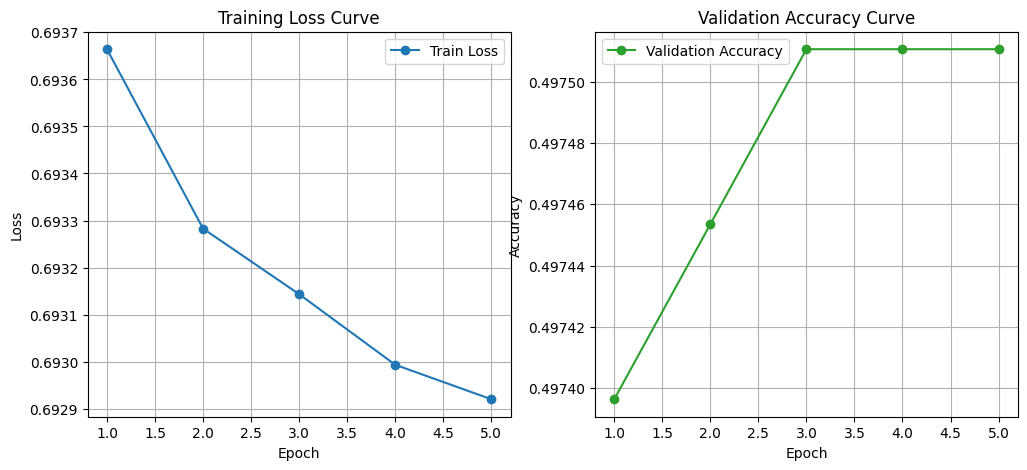

In [ ]:
# ======= Visualization =======
def plot_curves(train_losses, val_accuracies):
    plt.figure(figsize=(12, 5))

    # Loss Curve
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs + 1), train_losses, marker='o', label='Train Loss', color='tab:blue')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Curve')
    plt.grid(True)
    plt.legend()

    # Accuracy Curve
    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs + 1), val_accuracies, marker='o', label='Validation Accuracy', color='tab:green')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy Curve')
    plt.grid(True)
    plt.legend()

    plt.show()

plot_curves(train_losses, val_accuracies)

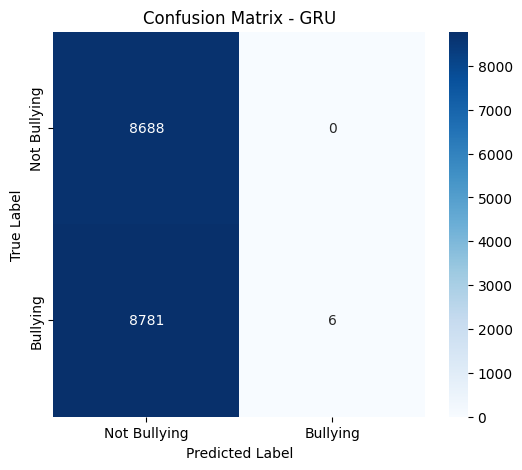

In [ ]:
# ======= Confusion Matrix =======
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Bullying', 'Bullying'],
            yticklabels=['Not Bullying', 'Bullying'])
plt.title('Confusion Matrix - GRU')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

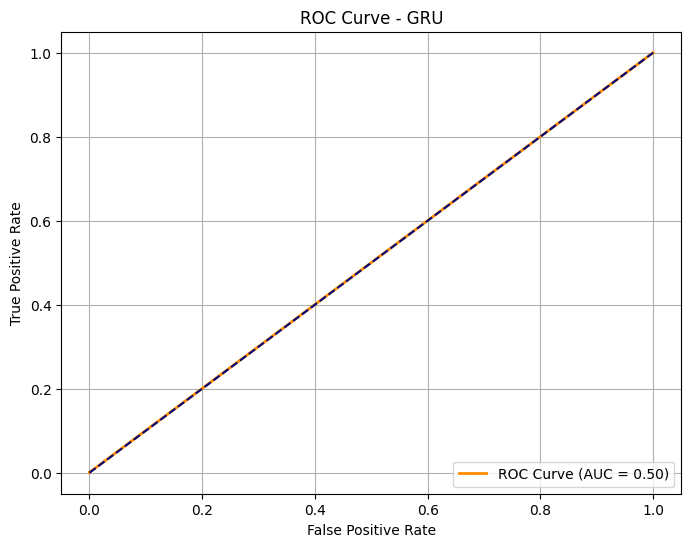

In [ ]:
# ======= ROC Curve =======
fpr, tpr, _ = roc_curve(all_labels, all_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - GRU')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# ======= Final Scores =======
f1 = f1_score(all_labels, all_preds)
precision = classification_report(all_labels, all_preds, output_dict=True)['1']['precision']
recall = classification_report(all_labels, all_preds, output_dict=True)['1']['recall']
accuracy = accuracy_score(all_labels, all_preds)

print(f"📊 Final Metrics:")
print(f"  ✔️ Accuracy:  {accuracy:.4f}")
print(f"  ✔️ F1 Score:  {f1:.4f}")
print(f"  ✔️ Precision: {precision:.4f}")
print(f"  ✔️ Recall:    {recall:.4f}")

📊 Final Metrics:
  ✔️ Accuracy:  0.4975
  ✔️ F1 Score:  0.0014
  ✔️ Precision: 1.0000
  ✔️ Recall:    0.0007


### **BiGRU Model**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, get_scheduler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Device setup
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


In [ ]:
# Load BERT tokenizer (just for consistent tokenization process)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


In [ ]:

# === Text Encoding Function ===
def encode_texts(texts, max_len=128):
    encoded = tokenizer.batch_encode_plus(
        texts,
        add_special_tokens=True,
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_attention_mask=False,  # BiGRU doesn't need attention mask
        return_tensors='pt'
    )
    return encoded['input_ids']

In [ ]:
# === Prepare Data ===
texts, labels = df['text'].tolist(), df['label'].tolist()
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

train_input_ids = encode_texts(train_texts)
val_input_ids = encode_texts(val_texts)

train_labels = torch.tensor(train_labels, dtype=torch.long)
val_labels = torch.tensor(val_labels, dtype=torch.long)

# Datasets & Dataloaders
train_dataset = TensorDataset(train_input_ids, train_labels)
val_dataset = TensorDataset(val_input_ids, val_labels)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)


In [ ]:

# === BiGRU Model ===
class BiGRUClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim=128, hidden_dim=256, num_layers=2, num_classes=2, dropout=0.3):
        super(BiGRUClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.gru = nn.GRU(embed_dim, hidden_dim, num_layers=num_layers,
                          bidirectional=True, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_dim * 2, num_classes)  # *2 for bidirectional GRU
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = self.embedding(x)  # (batch_size, seq_len, embed_dim)
        gru_out, _ = self.gru(x)  # (batch_size, seq_len, hidden_dim*2)
        last_hidden = gru_out[:, -1, :]  # take last step output (bi-directional combined)
        out = self.dropout(last_hidden)
        return self.fc(out)


In [ ]:
# === Initialize Model ===
vocab_size = tokenizer.vocab_size
model = BiGRUClassifier(vocab_size).to(device)

# === Optimizer, Loss, Scheduler ===
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-4, weight_decay=1e-5)
criterion = nn.CrossEntropyLoss()
scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=len(train_loader) * 5)


In [ ]:
# === Training Loop ===
train_losses, val_accuracies = [], []

for epoch in range(5):  # 5 epochs
    model.train()
    running_loss = 0.0

    for input_ids, labels in train_loader:
        input_ids, labels = input_ids.to(device), labels.to(device)

        logits = model(input_ids)
        loss = criterion(logits, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)

    # === Validation ===
    model.eval()
    all_preds, all_labels, all_probs = [], [], []

    with torch.no_grad():
        for input_ids, labels in val_loader:
            input_ids, labels = input_ids.to(device), labels.to(device)

            logits = model(input_ids)
            probs = F.softmax(logits, dim=1)
            preds = torch.argmax(probs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs[:, 1].cpu().numpy())

    val_acc = accuracy_score(all_labels, all_preds)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/5 - Loss: {avg_loss:.4f} - Val Accuracy: {val_acc:.4f}")


Epoch 1/5 - Loss: 0.6935 - Val Accuracy: 0.5028
Epoch 2/5 - Loss: 0.6933 - Val Accuracy: 0.4975
Epoch 3/5 - Loss: 0.6931 - Val Accuracy: 0.4975
Epoch 4/5 - Loss: 0.6930 - Val Accuracy: 0.4975
Epoch 5/5 - Loss: 0.6930 - Val Accuracy: 0.4975


In [ ]:

# === Evaluation Metrics ===
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=['Not Bullying', 'Bullying']))



Classification Report:
              precision    recall  f1-score   support

Not Bullying       0.50      1.00      0.66      8688
    Bullying       1.00      0.00      0.00      8787

    accuracy                           0.50     17475
   macro avg       0.75      0.50      0.33     17475
weighted avg       0.75      0.50      0.33     17475



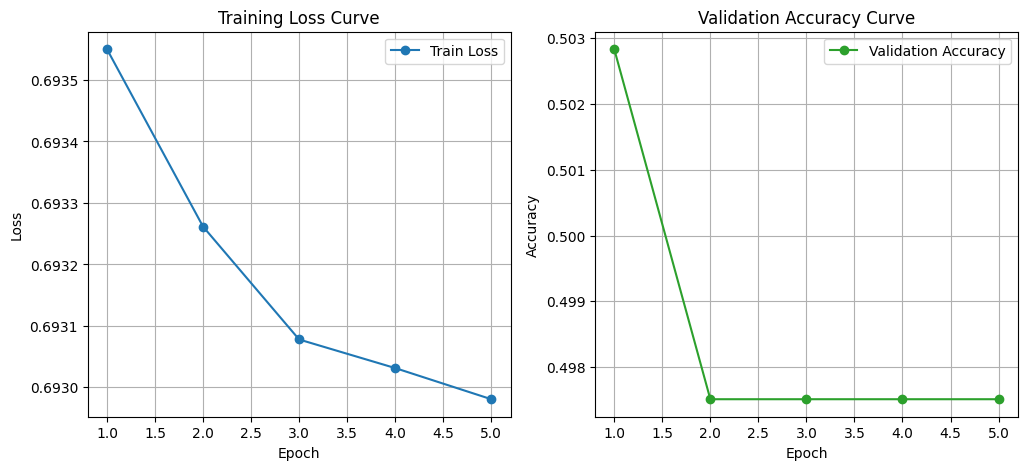

In [ ]:
# === Plotting Loss & Accuracy ===
def plot_curves(train_losses, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 5))

    # Loss Curve
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'o-', label='Train Loss', color='tab:blue')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Curve')
    plt.grid(True)
    plt.legend()

    # Accuracy Curve
    plt.subplot(1, 2, 2)
    plt.plot(epochs, val_accuracies, 'o-', label='Validation Accuracy', color='tab:green')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy Curve')
    plt.grid(True)
    plt.legend()

    plt.show()

plot_curves(train_losses, val_accuracies)

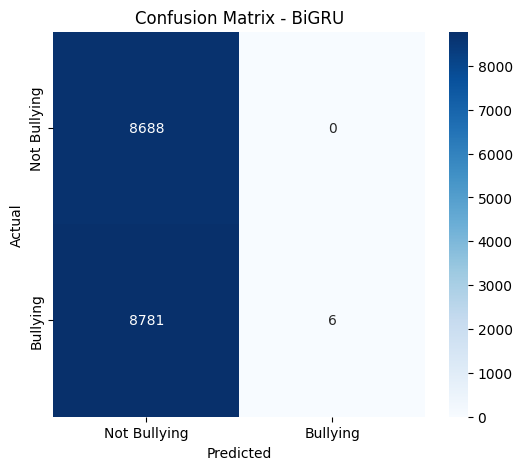

In [ ]:
# === Confusion Matrix ===
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Bullying', 'Bullying'],
            yticklabels=['Not Bullying', 'Bullying'])
plt.title('Confusion Matrix - BiGRU')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

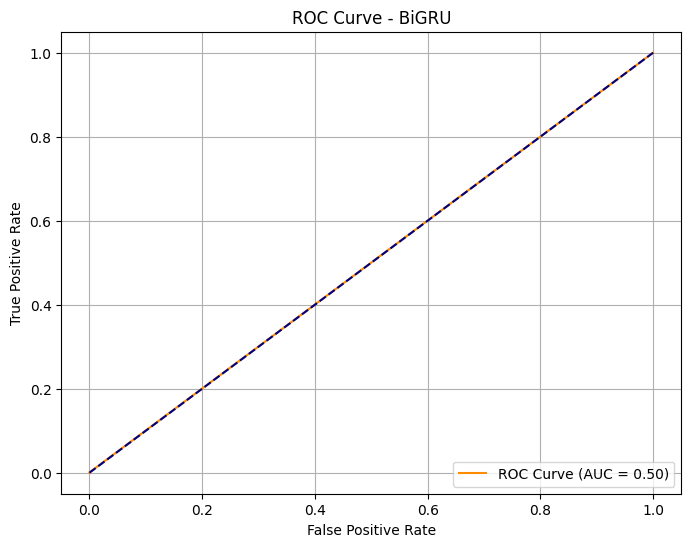

In [ ]:
# === ROC Curve ===
fpr, tpr, _ = roc_curve(all_labels, all_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - BiGRU')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# === Final Scores ===
f1 = f1_score(all_labels, all_preds)
precision = classification_report(all_labels, all_preds, output_dict=True)['1']['precision']
recall = classification_report(all_labels, all_preds, output_dict=True)['1']['recall']
accuracy = accuracy_score(all_labels, all_preds)

print(f"📊 Final Metrics:")
print(f"✔️ Accuracy:  {accuracy:.4f}")
print(f"✔️ F1 Score:  {f1:.4f}")
print(f"✔️ Precision: {precision:.4f}")
print(f"✔️ Recall:    {recall:.4f}")

📊 Final Metrics:
✔️ Accuracy:  0.4975
✔️ F1 Score:  0.0014
✔️ Precision: 1.0000
✔️ Recall:    0.0007


## **Hybrid Model**

### **Random forest + BERT**

In [ ]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Check if GPU is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased').to(device)

# Function to get BERT embeddings
def get_bert_embeddings(texts, tokenizer, model, device, max_len=128):
    model.eval()
    embeddings = []

    for text in texts:
        encoded = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        input_ids = encoded['input_ids'].to(device)
        attention_mask = encoded['attention_mask'].to(device)

        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            # Use the [CLS] token's embedding as the sentence embedding
            cls_embedding = outputs.last_hidden_state[:, 0, :].cpu().numpy()
            embeddings.append(cls_embedding)

    return np.vstack(embeddings)

# Prepare dataset
texts = df['text'].tolist()
labels = df['label'].tolist()

# Split data
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Get BERT embeddings for training and validation data
train_embeddings = get_bert_embeddings(train_texts, tokenizer, bert_model, device)
val_embeddings = get_bert_embeddings(val_texts, tokenizer, bert_model, device)

# Train Random Forest on BERT embeddings
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train_embeddings, train_labels)

# Predictions
val_preds = rf_model.predict(val_embeddings)

# Evaluation
print("Hybrid Model (BERT + Random Forest) Results:")
print(classification_report(val_labels, val_preds))
print("Accuracy:", accuracy_score(val_labels, val_preds))

Using device: cuda
Hybrid Model (BERT + Random Forest) Results:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      8688
           1       0.95      0.90      0.92      8787

    accuracy                           0.93     17475
   macro avg       0.93      0.93      0.93     17475
weighted avg       0.93      0.93      0.93     17475

Accuracy: 0.9259513590844063


### **LSTM + BERT**

In [ ]:
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, accuracy_score
from tqdm import tqdm  # For progress bar
import numpy as np

# Check if GPU is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")


Using device: cuda


In [ ]:

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased').to(device)

# Function to get BERT embeddings in batches
def get_bert_embeddings(texts, tokenizer, model, device, batch_size=32, max_len=128):
    model.eval()
    embeddings = []

    for i in tqdm(range(0, len(texts), batch_size), desc='Generating BERT embeddings'):
        batch_texts = texts[i:i + batch_size]
        encoded = tokenizer.batch_encode_plus(
            batch_texts,
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        input_ids = encoded['input_ids'].to(device)
        attention_mask = encoded['attention_mask'].to(device)

        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            batch_embeddings = outputs.last_hidden_state.mean(dim=1).cpu().numpy()  # Mean pooling
            embeddings.append(batch_embeddings)

    return np.vstack(embeddings)



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
# Prepare dataset
texts = df['text'].tolist()
labels = df['label'].tolist()




In [ ]:
# Split data
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Get BERT embeddings for training and validation data
train_embeddings = get_bert_embeddings(train_texts, tokenizer, bert_model, device)
val_embeddings = get_bert_embeddings(val_texts, tokenizer, bert_model, device)

# Convert embeddings and labels to PyTorch tensors
train_embeddings = torch.tensor(train_embeddings, dtype=torch.float32)
val_embeddings = torch.tensor(val_embeddings, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.long)
val_labels = torch.tensor(val_labels, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(train_embeddings, train_labels)
val_dataset = TensorDataset(val_embeddings, val_labels)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)  # Increased batch size
val_loader = DataLoader(val_dataset, batch_size=64)


Generating BERT embeddings: 100%|██████████| 547/547 [01:56<00:00,  4.69it/s]


In [ ]:

# Define the Hybrid LSTM + BERT Model
class HybridBERTLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout):
        super(HybridBERTLSTM, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=n_layers,
            bidirectional=bidirectional,
            dropout=dropout if n_layers > 1 else 0,
            batch_first=True
        )
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        lstm_output, (hidden, _) = self.lstm(x.unsqueeze(1))  # Add seq_len dimension
        if self.lstm.bidirectional:
            hidden = self.dropout(torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1))
        else:
            hidden = self.dropout(hidden[-1, :, :])
        output = self.fc(hidden)
        return output


In [ ]:

# Initialize the hybrid model
hidden_dim = 256
output_dim = 2  # Binary classification
n_layers = 2
bidirectional = True

model = HybridBERTLSTM(768, hidden_dim, output_dim, n_layers, bidirectional, dropout=0.5).to(device)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()


In [ ]:

# Training loop with progress bar
epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for embeddings, labels in tqdm(train_loader, desc=f'Training Epoch {epoch + 1}/{epochs}'):
        embeddings, labels = embeddings.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(embeddings)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {avg_train_loss:.4f}")

    # Validation
    model.eval()
    val_preds, val_true = [], []
    with torch.no_grad():
        for embeddings, labels in tqdm(val_loader, desc='Validating'):
            embeddings, labels = embeddings.to(device), labels.to(device)
            outputs = model(embeddings)
            preds = torch.argmax(outputs, dim=1).cpu().numpy()
            val_preds.extend(preds)
            val_true.extend(labels.cpu().numpy())

    val_accuracy = accuracy_score(val_true, val_preds)
    print(f"Epoch {epoch + 1}/{epochs}, Validation Accuracy: {val_accuracy:.4f}")



Training Epoch 1/5: 100%|██████████| 1093/1093 [00:06<00:00, 171.86it/s]


Epoch 1/5, Training Loss: 0.4797


Validating: 100%|██████████| 274/274 [00:00<00:00, 683.81it/s]


Epoch 1/5, Validation Accuracy: 0.7991


Training Epoch 2/5: 100%|██████████| 1093/1093 [00:06<00:00, 164.63it/s]


Epoch 2/5, Training Loss: 0.4253


Validating: 100%|██████████| 274/274 [00:00<00:00, 744.58it/s]


Epoch 2/5, Validation Accuracy: 0.8036


Training Epoch 3/5: 100%|██████████| 1093/1093 [00:05<00:00, 189.09it/s]


Epoch 3/5, Training Loss: 0.4126


Validating: 100%|██████████| 274/274 [00:00<00:00, 767.17it/s]


Epoch 3/5, Validation Accuracy: 0.8131


Training Epoch 4/5: 100%|██████████| 1093/1093 [00:06<00:00, 162.78it/s]


Epoch 4/5, Training Loss: 0.4025


Validating: 100%|██████████| 274/274 [00:00<00:00, 780.82it/s]


Epoch 4/5, Validation Accuracy: 0.8177


Training Epoch 5/5: 100%|██████████| 1093/1093 [00:05<00:00, 189.73it/s]


Epoch 5/5, Training Loss: 0.3945


Validating: 100%|██████████| 274/274 [00:00<00:00, 679.73it/s]

Epoch 5/5, Validation Accuracy: 0.8185


In [ ]:
# Final evaluation
print("Hybrid BERT + LSTM Results:")
print(classification_report(val_true, val_preds))
print("Accuracy:", accuracy_score(val_true, val_preds))

Hybrid BERT + LSTM Results:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84      8688
           1       0.91      0.71      0.80      8787

    accuracy                           0.82     17475
   macro avg       0.84      0.82      0.82     17475
weighted avg       0.84      0.82      0.82     17475

Accuracy: 0.8185407725321888


### **SVM + LSTM**

In [ ]:
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertModel # If you want to use BERT embeddings instead of TF-IDF
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Check if GPU is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# 1. Prepare Data:
# Assuming you have your data in a pandas DataFrame 'df' with 'text' and 'label' columns

# a. Text Preprocessing:
#    - Perform text cleaning, tokenization, etc., as needed.
#    - You might need to convert text to numerical representations using TF-IDF or BERT embeddings.

# b. Split Data:
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42
)


# 2. Feature Extraction:
# a. TF-IDF (If not using BERT):
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
train_features = vectorizer.fit_transform(train_texts)
val_features = vectorizer.transform(val_texts)

# b. BERT (Optional):
# If using BERT, you'll need to get embeddings for your text data:
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# bert_model = BertModel.from_pretrained('bert-base-uncased').to(device)
# train_features = get_bert_embeddings(train_texts, tokenizer, bert_model, device)  # Function to get embeddings
# val_features = get_bert_embeddings(val_texts, tokenizer, bert_model, device)

# 3. LSTM Model:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Reshape input for LSTM: (batch_size, seq_len, input_dim)
        x = x.unsqueeze(1)  # Assuming your input is (batch_size, input_dim)
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Get the last hidden state
        return out

# 4. Hybrid Model:
# a. Train LSTM:
input_dim = train_features.shape[1]  # Adjust based on features (TF-IDF or BERT)
hidden_dim = 128
output_dim = 2  # Assuming binary classification
lstm_model = LSTMModel(input_dim, hidden_dim, output_dim).to(device)
optimizer = torch.optim.Adam(lstm_model.parameters())
criterion = nn.CrossEntropyLoss()

train_dataset = TensorDataset(torch.tensor(train_features.toarray(), dtype=torch.float32),
                             torch.tensor(train_labels.values, dtype=torch.long)) # Convert train_labels to NumPy array
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

for epoch in range(10):  # 10 epochs
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = lstm_model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

# b. Get LSTM Predictions:
lstm_model.eval()
lstm_preds = []
with torch.no_grad():
    for data, _ in train_loader:  # Get predictions on training data
        data = data.to(device)
        output = lstm_model(data)
        preds = torch.argmax(output, dim=1).cpu().numpy()
        lstm_preds.extend(preds)

# c. Combine Features and LSTM Predictions:
combined_train_features = np.hstack([train_features.toarray(), np.array(lstm_preds).reshape(-1, 1)])

# d. Train Random Forest:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(combined_train_features, train_labels)

# 5. Evaluation:
# a. Get LSTM Predictions for Validation Data:
lstm_val_preds = []
val_dataset = TensorDataset(torch.tensor(val_features.toarray(), dtype=torch.float32),
                           torch.tensor(val_labels, dtype=torch.long))
val_loader = DataLoader(val_dataset, batch_size=64)
with torch.no_grad():
    for data, _ in val_loader:
        data = data.to(device)
        output = lstm_model(data)
        preds = torch.argmax(output, dim=1).cpu().numpy()
        lstm_val_preds.extend(preds)

# b. Combine Features and LSTM Predictions for Validation:
combined_val_features = np.hstack([val_features.toarray(), np.array(lstm_val_preds).reshape(-1, 1)])

# c. Make Predictions and Evaluate:
val_preds = rf_model.predict(combined_val_features)
print("Hybrid Model Results:")
print(classification_report(val_labels, val_preds))
print("Accuracy:", accuracy_score(val_labels, val_preds))

Using device: cuda
